## Maximum Likelihood Estimation

In [231]:
from math import factorial as fac
from numpy import math
import numpy as np
import random
from collections import Counter
%matplotlib inline

In [308]:
n = 1000
experiments = []

for i in range(n):
    a = random.randint(1, 6)
    # key = "{}-{}".format(a, b)
    # experiments[key] = experiments.get(key, 0) + 1
    experiments.append(a)

In [309]:
from matplotlib import pyplot as plt
%matplotlib inline

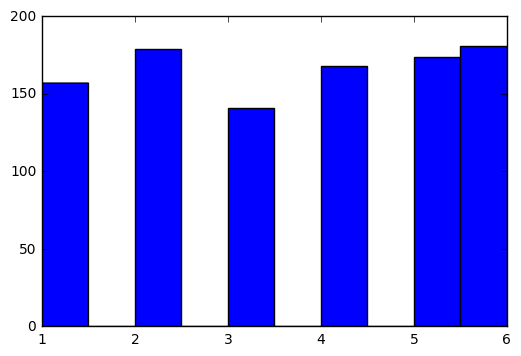

In [310]:
x = experiments
plt.hist(x)
plt.show()

In [315]:
A = [1, 2, 3, 4, 5, 6]
n4 = 10
experiments = [1] * 22 + [2] * 16 + [3] * 21 + [4] * n4 + [5] * 19 + [6] * 12
n = len(experiments) * 1.0
print(n)

100.0


In [316]:
lh = []
for i in range(1, 100):
    P4 = 1.0/i
    lh.append(math.factorial(n) / math.factorial(n4) * math.factorial(n-n4) *  ( (P4**n4) * ((1-P4) ** (n-n4)) ))

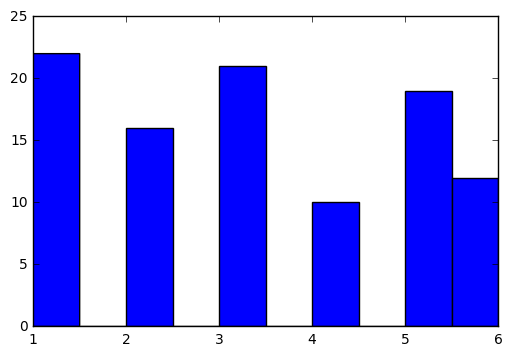

In [317]:
plt.hist(experiments)
plt.show()

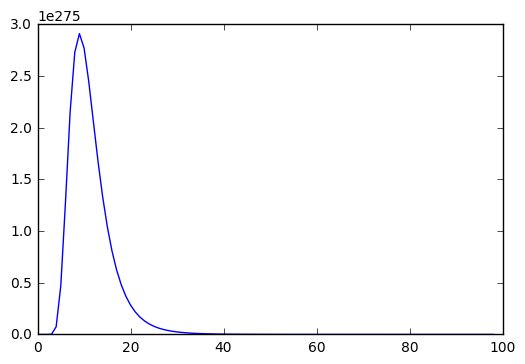

In [318]:
plt.plot(lh)

#### Best parameter for n4

In [52]:
n4/n

0.1

### after removing the constant part

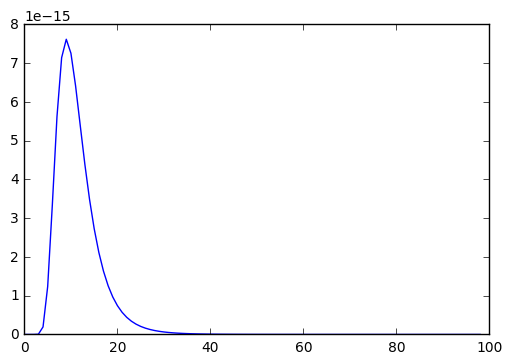

In [53]:
lh = []
for i in range(1, 100):
    P4 = 1.0/i
    lh.append( (P4**n4) * ((1-P4) ** (n-n4)) )
plt.plot(lh)

## Coin example

#### Setup problem

In [285]:
# denoting tails by 0 and heads by 1
TAIL = 0
HEAD = 1

# tossing coint N times
N = 10

# 8 of N times tail occurs
TAIL_COUNT = 8

experiments = [TAIL] * TAIL_COUNT + [HEAD] * (N - TAIL_COUNT)
print(experiments, N)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1] 10


Looking at the experient shown above, we can easily predict that the probability of TAIL is 6/10, that is higher than the probability of HEAD 4/10.

It is easy to calculate the probabilities in this setup without getting involved in Maximum likelihood. However, there are other problems which are not so obvious as this coin tossing. So, we are now going to calculate this probabilities with a more methodological way.

> Probability
>>   Knowing parameters  -> Prediction of outcome
> 
> Likelihood
>>   Observation of data -> Estimation of parameters

### Bernoulli distribution

$$p(X=r; N, p) = \frac{N!}{r! (N-r)!} p^r * (1-p)^{N-r} $$
Applying the formula to the coing tossing problem, we end up with the following expression:
$$
\frac{N!}{TAILS\_COUNT! (N-TAILS\_COUNT)!} P\_TAIL^{TAILS\_COUNT} * P\_HEAD^{HEADS\_COUNT} 
$$

\begin{eqnarray}
{\cal L}(\theta |\pi_1\cdots \pi_n) & = & \prod_{n=1}^{N} f(x_{n};\theta ) 
\\
& = & \prod_{n=1}^{N}  \theta^{x_{n}} (1-\theta)^{1-x_{n}}
\\
log{\cal L}(\theta) & = & \sum_{n=1}^N x^{(n)} \log (\theta) + \sum_{n=1}^N (1- x^{(n)}) \log (1 - \theta)
\\
& = & \log (\theta) \sum_{n=1}^N x^{(n)}  + \log (1 - \theta) \sum_{n=1}^N (1- x^{(n)}) 
\end{eqnarray}


The likelihood function is simply the joint probability of observing the data.

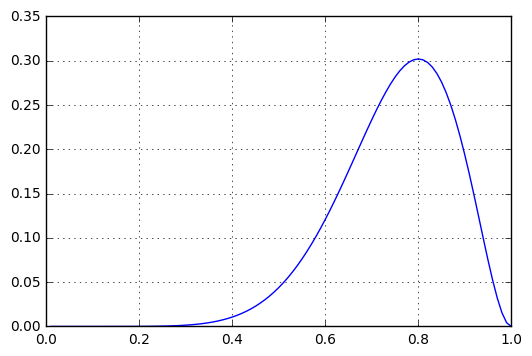

In [288]:
PROBABILITY_SCALE = 100
likelihoods = []
for i in range(1, PROBABILITY_SCALE  + 1):
    P_TAIL = float(i) / PROBABILITY_SCALE
    constant_part = (
        math.factorial(N) / 
        (math.factorial(TAIL_COUNT) * math.factorial(N-TAIL_COUNT)))
    likelihood = (
        constant_part * 
        np.power(P_TAIL, TAIL_COUNT) * 
        np.power(1 - P_TAIL, N - TAIL_COUNT))
    
    likelihoods.append((P_TAIL, likelihood))
plt.grid(True)
plt.plot(np.array(likelihoods)[:,0], np.array(likelihoods)[:,1])

This binomial distribution figure illustrates the probability of TAIL is maximized around 6/10. It could also be other values such as 5/10 or 7/10, but the aim here is to find the parameter which makes the observed data most likely. 

> Beyond parameter estimation, the likelihood framework allows us to make tests of parameter values. For example, we might want to ask whether or not the estimated p differs significantly from 0.5 or not. This test is essentially asking: is there evidence that the coin is biased? We will see how such tests can be performed when we introduce the concept of a likelihood ratio test below.

> We will learn that especially for large samples, the maximum likelihood estimators have many desirable properties. However, especially for high dimensional data, the likelihood can have many local maxima. Thus, finding the global maximum can be a major computational challenge.